In [1]:
# importing

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# opening json file

with open ('transaction-data-adhoc-analysis.json','r') as f:
    data = json.load(f)

In [3]:
# creating a pandas dataframe from the json file

df = pd.read_json('transaction-data-adhoc-analysis.json')

# dataframe dump

df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [19]:
# filter dataframe to relevant columns only

filtered_df = df[['transaction_date','username','transaction_value','transaction_items']]
filtered_df

,transaction_date,username,transaction_value,transaction_items
0,2022/01/12,veronicawells,5196,"Exotic Extras,Beef Chicharon,(x4)"
1,2022/01/12,cgilbert,12056,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3..."
2,2022/01/08,cgilbert,5500,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3..."
3,2022/01/10,cgilbert,500,"HealthyKid 3+,Yummy Vegetables,(x1)"
4,2022/01/24,qhernandez,2697,"Candy City,Orange Beans,(x3);Candy City,Gummy ..."
...,...,...,...,...
83031,2022/06/05,kmcconnell,3588,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK..."
83032,2022/06/12,llowe,2095,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext..."
83033,2022/06/15,llowe,3396,"Candy City,Orange Beans,(x4);Candy City,Gummy ..."
83034,2022/06/09,llowe,4280,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G..."


In [20]:
# figuring out individual prices of items

filtered_df.head(20)

,transaction_date,username,transaction_value,transaction_items
0,2022/01/12,veronicawells,5196,"Exotic Extras,Beef Chicharon,(x4)"
1,2022/01/12,cgilbert,12056,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3..."
2,2022/01/08,cgilbert,5500,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3..."
3,2022/01/10,cgilbert,500,"HealthyKid 3+,Yummy Vegetables,(x1)"
4,2022/01/24,qhernandez,2697,"Candy City,Orange Beans,(x3);Candy City,Gummy ..."
5,2022/01/11,esmith,2990,"HealthyKid 3+,Nutrional Milk,(x1);HealthyKid 3..."
6,2022/01/20,richardhays,3196,"Exotic Extras,Kimchi and Seaweed,(x4)"
7,2022/01/08,hoodbrett,6980,"HealthyKid 3+,Gummy Vitamins,(x2);HealthyKid 3..."
8,2022/01/11,hoodbrett,150,"Candy City,Gummy Worms,(x1)"
9,2022/01/19,hoodbrett,10196,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext..."


In [112]:
# getting value of full transaction_items from original dataframe

filtered_df.iat[13,3]

# changing this allows me to look for the price of an individual item

'Exotic Extras,Beef Chicharon,(x2);Candy City,Orange Beans,(x2)'

In [53]:
# CREATING A NEW DATAFRAME FOR PRICES (will be multiplied to count later on to get total value)

pricelist = [{'item':'Beef Chicharon','price':1299},
            {'item':'Gummy Vitamins','price':1500},
            {'item':'Gummy Worms','price':150},
            {'item':'Kimchi and Seaweed','price':799},
            {'item':'Nutrional Milk','price':1990},
            {'item':'Orange Beans','price':199},
            {'item':'Yummy Vegetables','price':500}]
pricelist_df = pd.DataFrame(pricelist)
pricelist_df

,item,price
0,Beef Chicharon,1299
1,Gummy Vitamins,1500
2,Gummy Worms,150
3,Kimchi and Seaweed,799
4,Nutrional Milk,1990
5,Orange Beans,199
6,Yummy Vegetables,500


In [23]:
# 1 PRODUCT PER ROW

fixed_rows_df = filtered_df.set_index(['transaction_date','username','transaction_value']).apply(lambda x: x.str.split(';').explode()).reset_index()
fixed_rows_df

,transaction_date,username,transaction_value,transaction_items
0,2022/01/12,veronicawells,5196,"Exotic Extras,Beef Chicharon,(x4)"
1,2022/01/12,cgilbert,12056,"Exotic Extras,Beef Chicharon,(x3)"
2,2022/01/12,cgilbert,12056,"HealthyKid 3+,Nutrional Milk,(x4)"
3,2022/01/12,cgilbert,12056,"Candy City,Orange Beans,(x1)"
4,2022/01/08,cgilbert,5500,"HealthyKid 3+,Gummy Vitamins,(x3)"
...,...,...,...,...
166114,2022/06/09,llowe,4280,"HealthyKid 3+,Nutrional Milk,(x2)"
166115,2022/06/09,llowe,4280,"Candy City,Gummy Worms,(x2)"
166116,2022/06/03,cmcdowell,2639,"HealthyKid 3+,Nutrional Milk,(x1)"
166117,2022/06/03,cmcdowell,2639,"Candy City,Gummy Worms,(x3)"


In [24]:
# CREATING A PIVOT TABLE FOR PRODUCT BREAKDOWN

# Create dataframe copy, and new column for only the month name

pivot_df = fixed_rows_df.copy()

def month(transaction_date):
    if '2022/01' in transaction_date:
        return 'January'
    elif '2022/02' in transaction_date:
        return 'February'
    elif '2022/03' in transaction_date:
        return 'March'
    elif '2022/04' in transaction_date:
        return 'April'
    elif '2022/05' in transaction_date:
        return 'May'
    elif '2022/06' in transaction_date:
        return 'June'

pivot_df['month'] = pivot_df['transaction_date'].apply(month)

pivot_df

,transaction_date,username,transaction_value,transaction_items,month
0,2022/01/12,veronicawells,5196,"Exotic Extras,Beef Chicharon,(x4)",January
1,2022/01/12,cgilbert,12056,"Exotic Extras,Beef Chicharon,(x3)",January
2,2022/01/12,cgilbert,12056,"HealthyKid 3+,Nutrional Milk,(x4)",January
3,2022/01/12,cgilbert,12056,"Candy City,Orange Beans,(x1)",January
4,2022/01/08,cgilbert,5500,"HealthyKid 3+,Gummy Vitamins,(x3)",January
...,...,...,...,...,...
166114,2022/06/09,llowe,4280,"HealthyKid 3+,Nutrional Milk,(x2)",June
166115,2022/06/09,llowe,4280,"Candy City,Gummy Worms,(x2)",June
166116,2022/06/03,cmcdowell,2639,"HealthyKid 3+,Nutrional Milk,(x1)",June
166117,2022/06/03,cmcdowell,2639,"Candy City,Gummy Worms,(x3)",June


In [25]:
# split transaction_items

new_pivot = pivot_df.transaction_items.str.split(pat=',',expand=True)

In [26]:
# call to check
new_pivot

,0,1,2
0,Exotic Extras,Beef Chicharon,(x4)
1,Exotic Extras,Beef Chicharon,(x3)
2,HealthyKid 3+,Nutrional Milk,(x4)
3,Candy City,Orange Beans,(x1)
4,HealthyKid 3+,Gummy Vitamins,(x3)
...,...,...,...
166114,HealthyKid 3+,Nutrional Milk,(x2)
166115,Candy City,Gummy Worms,(x2)
166116,HealthyKid 3+,Nutrional Milk,(x1)
166117,Candy City,Gummy Worms,(x3)


In [27]:
# rename columns in new_pivot

new_pivot.rename(columns = {0:'brand', 1:'item', 2:'quantity'}, inplace = True)

#convert values in quantity column to integers
new_pivot['quantity'] = new_pivot['quantity'].str.replace(r'\D', '')
new_pivot['quantity'] = new_pivot['quantity'].astype('int')

# call dataframe
new_pivot

/var/folders/3s/xv7dpzpn0rsgb0drk1fvhll00000gn/T/ipykernel_25900/2470238115.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  new_pivot['quantity'] = new_pivot['quantity'].str.replace(r'\D', '')


,brand,item,quantity
0,Exotic Extras,Beef Chicharon,4
1,Exotic Extras,Beef Chicharon,3
2,HealthyKid 3+,Nutrional Milk,4
3,Candy City,Orange Beans,1
4,HealthyKid 3+,Gummy Vitamins,3
...,...,...,...
166114,HealthyKid 3+,Nutrional Milk,2
166115,Candy City,Gummy Worms,2
166116,HealthyKid 3+,Nutrional Milk,1
166117,Candy City,Gummy Worms,3


In [28]:
# concatenate pivot_df and new_pivot

final_pivot = pd.concat([pivot_df, new_pivot], axis=1)

In [28]:
# call final_pivot
final_pivot

,transaction_date,username,transaction_value,transaction_items,month,brand,item,quantity
0,2022/01/12,veronicawells,5196,"Exotic Extras,Beef Chicharon,(x4)",January,Exotic Extras,Beef Chicharon,4
1,2022/01/12,cgilbert,12056,"Exotic Extras,Beef Chicharon,(x3)",January,Exotic Extras,Beef Chicharon,3
2,2022/01/12,cgilbert,12056,"HealthyKid 3+,Nutrional Milk,(x4)",January,HealthyKid 3+,Nutrional Milk,4
3,2022/01/12,cgilbert,12056,"Candy City,Orange Beans,(x1)",January,Candy City,Orange Beans,1
4,2022/01/08,cgilbert,5500,"HealthyKid 3+,Gummy Vitamins,(x3)",January,HealthyKid 3+,Gummy Vitamins,3
...,...,...,...,...,...,...,...,...
166114,2022/06/09,llowe,4280,"HealthyKid 3+,Nutrional Milk,(x2)",June,HealthyKid 3+,Nutrional Milk,2
166115,2022/06/09,llowe,4280,"Candy City,Gummy Worms,(x2)",June,Candy City,Gummy Worms,2
166116,2022/06/03,cmcdowell,2639,"HealthyKid 3+,Nutrional Milk,(x1)",June,HealthyKid 3+,Nutrional Milk,1
166117,2022/06/03,cmcdowell,2639,"Candy City,Gummy Worms,(x3)",June,Candy City,Gummy Worms,3


In [29]:
# drop transaction_date, transaction_value, and transaction_items in final_pivot (not permanent)

final_pivot.drop(columns=['transaction_date','transaction_value','transaction_items'])

,username,month,brand,item,quantity
0,veronicawells,January,Exotic Extras,Beef Chicharon,4
1,cgilbert,January,Exotic Extras,Beef Chicharon,3
2,cgilbert,January,HealthyKid 3+,Nutrional Milk,4
3,cgilbert,January,Candy City,Orange Beans,1
4,cgilbert,January,HealthyKid 3+,Gummy Vitamins,3
...,...,...,...,...,...
166114,llowe,June,HealthyKid 3+,Nutrional Milk,2
166115,llowe,June,Candy City,Gummy Worms,2
166116,cmcdowell,June,HealthyKid 3+,Nutrional Milk,1
166117,cmcdowell,June,Candy City,Gummy Worms,3


In [113]:
# create new dataframe (where columns have been dropped) to be sure

PIVOT_DATAFRAME = final_pivot.drop(columns=['transaction_date','transaction_value','transaction_items'])
PIVOT_DATAFRAME

,username,month,brand,item,quantity
0,veronicawells,January,Exotic Extras,Beef Chicharon,4
1,cgilbert,January,Exotic Extras,Beef Chicharon,3
2,cgilbert,January,HealthyKid 3+,Nutrional Milk,4
3,cgilbert,January,Candy City,Orange Beans,1
4,cgilbert,January,HealthyKid 3+,Gummy Vitamins,3
...,...,...,...,...,...
166114,llowe,June,HealthyKid 3+,Nutrional Milk,2
166115,llowe,June,Candy City,Gummy Worms,2
166116,cmcdowell,June,HealthyKid 3+,Nutrional Milk,1
166117,cmcdowell,June,Candy City,Gummy Worms,3


In [94]:
# Pivot Table for Item Breakdown (order count per item)

total_item_count = pd.pivot_table(data=PIVOT_DATAFRAME, 
                        index=['item'], 
                        columns=['month'], 
                        values='quantity',
                        aggfunc='sum')
total_item_count[['January','February','March','April','May','June']]

month,January,February,March,April,May,June
item,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902
Gummy Vitamins,9681,9980,10145,9842,9948,9980
Gummy Worms,9559,9996,9986,10043,9801,9934
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104
Nutrional Milk,9727,9691,9876,9786,9881,9767
Orange Beans,9774,10037,9611,9914,9964,10106
Yummy Vegetables,9959,10256,9896,9861,9735,9722


In [95]:
# Table for Item Value Breakdown (total sale value per item)

total_sale_value = total_item_count.mul([pricelist_df.loc[0]['price'],pricelist_df.loc[1]['price'],pricelist_df.loc[2]['price'],
                pricelist_df.loc[3]['price'],pricelist_df.loc[4]['price'],pricelist_df.loc[5]['price'],
                pricelist_df.loc[6]['price']], axis=0)
total_sale_value[['January','February','March','April','May','June']]

month,January,February,March,April,May,June
item,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000


In [3]:
# CREATING A LOYALTY PROGRAM DATAFRAME

# describes customers' monthly engagement w the company

In [32]:
# create a list of all customers through their usernames using unique()
all_customers = list(filtered_df['username'].unique())

# create loyalty_program dataframe where usernames make up the data
loyalty_program = pd.DataFrame(all_customers,columns=['username'])
loyalty_program

,username
0,veronicawells
1,cgilbert
2,qhernandez
3,esmith
4,richardhays
...,...
8500,fishertanya
8501,rpham
8502,feliciabell
8503,kaylapalmer


In [41]:
# creating dataframes and lists of customers who purchased in a specific month

january_transactions = PIVOT_DATAFRAME[PIVOT_DATAFRAME['month'].str.contains('January')]
january_customers = list(january_transactions['username'].unique())

february_transactions = PIVOT_DATAFRAME[PIVOT_DATAFRAME['month'].str.contains('February')]
february_customers = list(february_transactions['username'].unique())

march_transactions = PIVOT_DATAFRAME[PIVOT_DATAFRAME['month'].str.contains('March')]
march_customers = list(march_transactions['username'].unique())

april_transactions = PIVOT_DATAFRAME[PIVOT_DATAFRAME['month'].str.contains('April')]
april_customers = list(april_transactions['username'].unique())

may_transactions = PIVOT_DATAFRAME[PIVOT_DATAFRAME['month'].str.contains('May')]
may_customers = list(may_transactions['username'].unique())

june_transactions = PIVOT_DATAFRAME[PIVOT_DATAFRAME['month'].str.contains('June')]
june_customers = list(june_transactions['username'].unique())


In [42]:
# add boolean columns to dataframe (TRUE if customer purchased in that month, FALSE if not) by vectorizing a function (applying it to a column)

# all functions

def jan_customers_function(username):
    return username in january_customers

def feb_customers_function(username):
    return username in february_customers

def mar_customers_function(username):
    return username in march_customers

def apr_customers_function(username):
    return username in april_customers

def may_customers_function(username):
    return username in may_customers

def june_customers_function(username):
    return username in june_customers

In [43]:
# creating the boolean columns

loyalty_program['january purchase'] = loyalty_program['username'].apply(jan_customers_function)
loyalty_program['february purchase'] = loyalty_program['username'].apply(feb_customers_function)
loyalty_program['march purchase'] = loyalty_program['username'].apply(mar_customers_function)
loyalty_program['april purchase'] = loyalty_program['username'].apply(apr_customers_function)
loyalty_program['may purchase'] = loyalty_program['username'].apply(may_customers_function)
loyalty_program['june purchase'] = loyalty_program['username'].apply(june_customers_function)

loyalty_program

,username,january purchase,february purchase,march purchase,april purchase,may purchase,june purchase
0,veronicawells,True,True,True,False,False,True
1,cgilbert,True,True,True,True,True,False
2,qhernandez,True,True,True,True,True,False
3,esmith,True,True,True,True,True,True
4,richardhays,True,True,True,True,True,True
...,...,...,...,...,...,...,...
8500,fishertanya,False,False,False,False,True,True
8501,rpham,False,False,False,False,True,False
8502,feliciabell,False,False,False,False,False,True
8503,kaylapalmer,False,False,False,False,False,True


In [44]:
# CUSTOMER TABLE

# variables

JAN_TRUE = loyalty_program['january purchase']==True
FEB_TRUE = loyalty_program['february purchase']==True
MAR_TRUE = loyalty_program['march purchase']==True
APR_TRUE = loyalty_program['april purchase']==True
MAY_TRUE = loyalty_program['may purchase']==True
JUN_TRUE = loyalty_program['june purchase']==True

JAN_FALSE = loyalty_program['january purchase']==False
FEB_FALSE = loyalty_program['february purchase']==False
MAR_FALSE = loyalty_program['march purchase']==False
APR_FALSE = loyalty_program['april purchase']==False
MAY_FALSE = loyalty_program['may purchase']==False
JUN_FALSE = loyalty_program['june purchase']==False

In [71]:
# REPEATERS

january_repeaters = "N/A" # since there is no previous month
february_repeaters = len(loyalty_program[(JAN_TRUE) & (FEB_TRUE)])
march_repeaters = len(loyalty_program[(MAR_TRUE) & (FEB_TRUE)])
april_repeaters = len(loyalty_program[(MAR_TRUE) & (APR_TRUE)])
may_repeaters = len(loyalty_program[(MAY_TRUE) & (APR_TRUE)])
june_repeaters = len(loyalty_program[(MAY_TRUE) & (JUN_TRUE)])

loyalty_program[(JAN_TRUE) & (FEB_TRUE)] # sample for february repeaters (count = num of rows, or use len())

,username,january purchase,february purchase,march purchase,april purchase,may purchase,june purchase
0,veronicawells,True,True,True,False,False,True
1,cgilbert,True,True,True,True,True,False
2,qhernandez,True,True,True,True,True,False
3,esmith,True,True,True,True,True,True
4,richardhays,True,True,True,True,True,True
...,...,...,...,...,...,...,...
6577,troyedwards,True,True,True,True,True,True
6578,arodriguez,True,True,False,False,False,False
6579,samanthadelgado,True,True,True,False,True,True
6580,sarah79,True,True,True,True,True,True


In [80]:
# INACTIVE

january_inactive = "N/A" # since there is no previous month
february_inactive = len(loyalty_program[(JAN_TRUE) & (FEB_FALSE)])
march_inactive = len(loyalty_program[((JAN_TRUE) | (FEB_TRUE)) & (MAR_FALSE)])
april_inactive = len(loyalty_program[((JAN_TRUE) | (FEB_TRUE) | (MAR_TRUE)) & (APR_FALSE)])
may_inactive = len(loyalty_program[((JAN_TRUE) | (FEB_TRUE) | (MAR_TRUE) | (APR_TRUE)) & (MAY_FALSE)])
june_inactive = len(loyalty_program[((JAN_TRUE) | (FEB_TRUE) | (MAR_TRUE) | (APR_TRUE) | (MAY_TRUE)) & (JUN_FALSE)])

loyalty_program[(JAN_TRUE) & (FEB_FALSE)] # sample for february inactive (count = num of rows, or use len())

,username,january purchase,february purchase,march purchase,april purchase,may purchase,june purchase
7,david85,True,False,True,True,True,True
9,frazierjanice,True,False,True,True,True,False
21,dianajordan,True,False,True,False,True,False
32,matthew57,True,False,True,True,True,True
37,carlamendoza,True,False,True,True,False,True
...,...,...,...,...,...,...,...
6557,daviddiaz,True,False,True,False,True,False
6558,victoriagraham,True,False,True,True,True,True
6565,greenkirsten,True,False,False,False,True,True
6569,ricardo85,True,False,False,True,True,True


In [114]:
# ENGAGED

january_engaged = len(loyalty_program[JAN_TRUE])
february_engaged = len(loyalty_program[JAN_TRUE & FEB_TRUE])
march_engaged = len(loyalty_program[(JAN_TRUE) & (FEB_TRUE) & (MAR_TRUE)])
april_engaged = len(loyalty_program[(JAN_TRUE) & (FEB_TRUE) & (MAR_TRUE) & (APR_TRUE)])
may_engaged = len(loyalty_program[(JAN_TRUE) & (FEB_TRUE) & (MAR_TRUE) & (APR_TRUE) & (MAY_TRUE)])
june_engaged = len(loyalty_program[(JAN_TRUE) & (FEB_TRUE) & (MAR_TRUE) & (APR_TRUE) & (MAY_TRUE) & (JUN_TRUE)])

loyalty_program[(JAN_TRUE) & (FEB_TRUE) & (MAR_TRUE)] # sample for march engaged (count = num of rows, or use len())

,username,january purchase,february purchase,march purchase,april purchase,may purchase,june purchase
0,veronicawells,True,True,True,False,False,True
1,cgilbert,True,True,True,True,True,False
2,qhernandez,True,True,True,True,True,False
3,esmith,True,True,True,True,True,True
4,richardhays,True,True,True,True,True,True
...,...,...,...,...,...,...,...
6576,kristenanthony,True,True,True,False,True,False
6577,troyedwards,True,True,True,True,True,True
6579,samanthadelgado,True,True,True,False,True,True
6580,sarah79,True,True,True,True,True,True


In [81]:
# customer activity table

customer_activity = {'Customer Categories':['Repeaters','Inactive','Engaged'],
                        'January':[january_repeaters,january_inactive,january_engaged],
                        'February':[february_repeaters,february_inactive,february_engaged],
                        'March':[march_repeaters,march_inactive,march_engaged],
                        'April':[april_repeaters,april_inactive,april_engaged],
                        'May':[may_repeaters,may_inactive,may_engaged],
                        'June':[june_repeaters,june_inactive,june_engaged]}
customer_activity_df = pd.DataFrame(customer_activity)
customer_activity_df

,Customer Categories,January,February,March,April,May,June
0,Repeaters,N/A,5167,5239,5191,5126,5208
1,Inactive,N/A,1416,1728,1912,1915,1840
2,Engaged,6583,5167,4141,3304,2685,2210


In [145]:
# matplotlib graphs

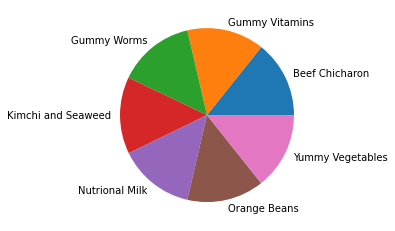

In [123]:
# pie chart for item count

item_labels = ['Beef Chicharon', 'Gummy Vitamins', 'Gummy Worms', 'Kimchi and Seaweed', 'Nutrional Milk', 'Orange Beans', 'Yummy Vegetables']
count_dataframe = total_item_count.sum(axis=1)
plt.pie(count_dataframe, labels=item_labels)
plt.show()

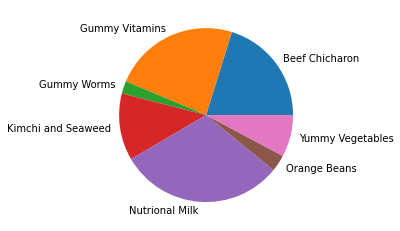

In [124]:
# pie chart for item value contribution to total revenue

sales_dataframe = total_sale_value.sum(axis=1)
plt.pie(sales_dataframe, labels=item_labels)
plt.show()